In [1]:
import pandas as pd

users = pd.read_csv('../users.csv')
print(users.head())

   Unnamed: 0        date      measure  value
0           0  2019-01-01  daily_users     67
1           1  2019-01-02  daily_users     51
2           2  2019-01-03  daily_users     58
3           3  2019-01-04  daily_users     71
4           4  2019-01-05  daily_users     28


In [2]:
#Unamed reset index
#dropna 
#drop_dupli~
#dtypes를 활용해 에러 고치기 및 평균
#date의 형태 확인, 변환 데이터타입 확인
#year month 컬럼 추가
#value컬럼의 형태를 float로 변경 확인
#groupby 최빈값
#시각화

In [3]:
# Unnamed: 0 이라는 컬럼이 인덱스가 되도록 수정하세요
users.index = users["Unnamed: 0"]
users = users.drop('Unnamed: 0',axis=1)
print(users.head())

                  date      measure  value
Unnamed: 0                                
0           2019-01-01  daily_users     67
1           2019-01-02  daily_users     51
2           2019-01-03  daily_users     58
3           2019-01-04  daily_users     71
4           2019-01-05  daily_users     28


In [4]:
academic = pd.read_csv('../academic.csv')
print(academic.head())

      year  students  us_students  undergraduate  graduate  non_degree  opt
0  1948/49     25464    2403400.0            NaN       NaN         NaN  NaN
1  1949/50     26433    2445000.0            NaN       NaN         NaN  NaN
2  1950/51     29813    2281000.0            NaN       NaN         NaN  NaN
3  1951/52     30462    2102000.0            NaN       NaN         NaN  NaN
4  1952/53     33675    2134000.0            NaN       NaN         NaN  NaN


In [5]:
# dropna를 활용해 결측치 제거하기
# 1) 결측치가 있는 모든 레코드를 제거 하세요 
academic2 = academic.dropna(axis = 0,how='any')
print(academic2.shape)

(44, 7)


In [6]:
# 2) 결측치가 있는 컬럼을 제거 하세요
academic3 = academic.dropna(axis = 1,how='any')
print(academic3.shape)

(75, 2)


In [7]:
# 3) 모든 데이터가 결측치인 컬럼을 제거 하세요 
academic4 = academic.dropna(axis = 1,how='all')
print(academic4.shape)

(75, 7)


In [8]:
column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                  'marital-status', 'occupation', 'relationship', 'race', 
                  'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                  'native-country', 'income']

adult_df = pd.read_csv('../adult.data',names=column_headers)
print(adult_df.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [9]:
# 1) drop_duplicates 를 활용해 중복값 제거하고 shape 확인하기 
adult2 = adult_df.drop_duplicates()
print(adult2.shape)

(32537, 15)


In [10]:
insurance_df = pd.read_csv('../train.csv')
print(insurance_df.head())

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0  


In [12]:
# 1) 아래 코드의 에러 원인을 dtypes를 활용해 파악하고, Gender 기준 평균을 올바르게 구하세요.
print(insurance_df.dtypes) # Gender object
print(insurance_df['Vehicle_Age'].unique())
insurance_df2 = insurance_df.drop(['Vehicle_Age', 'Vehicle_Damage'],axis=1)
print(insurance_df2.groupby(['Gender']).mean()) #drop해서 해결

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object
['> 2 Years' '1-2 Year' '< 1 Year']
                   id        Age  Driving_License  Region_Code  \
Gender                                                           
Female  190435.719352  36.372746         0.998789    26.380134   
Male    190656.298463  40.903095         0.997089    26.396173   

        Previously_Insured  Annual_Premium  Policy_Sales_Channel     Vintage  \
Gender                                                                         
Female            0.502508    30495.787990            118.572495  154.575917   
Male              0.420590    30622.649122            106.481

In [13]:
users2 = users
print(users2.head())

                  date      measure  value
Unnamed: 0                                
0           2019-01-01  daily_users     67
1           2019-01-02  daily_users     51
2           2019-01-03  daily_users     58
3           2019-01-04  daily_users     71
4           2019-01-05  daily_users     28


In [15]:
# 1) date의 형태를 확인하는 코드를 작성하고, datetime형태로 변환하고 데이터 타입을 확인하세요. 
print(users2['date'].dtypes)
users2['date'] = pd.to_datetime(users2['date'])
print(users2['date'].dtypes)

object
datetime64[ns]


In [21]:
# 2) year, month 컬럼을 추가하세요. 
print(users2['date'].dt.year)
users2['year'] = users2['date'].dt.year
users2['month'] = users2['date'].dt.month
print(users2.head())

Unnamed: 0
0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
1092    2021
1093    2021
1094    2021
1095    2021
1096    2022
Name: date, Length: 1097, dtype: int32
                 date      measure  value  year  month
Unnamed: 0                                            
0          2019-01-01  daily_users     67  2019      1
1          2019-01-02  daily_users     51  2019      1
2          2019-01-03  daily_users     58  2019      1
3          2019-01-04  daily_users     71  2019      1
4          2019-01-05  daily_users     28  2019      1


In [22]:
# 3) value컬럼의 형태(int)를 float으로 변경하고 확인하는 코드를 작성하세요. 
users2['value'] = users2['value'].astype(float)
print(users2.dtypes)

date       datetime64[ns]
measure            object
value             float64
year                int32
month               int32
dtype: object


In [24]:
# 아래처럼 최빈값(mode)은 groupby에 없는 속성으로 에러가 발생합니다. 
#insurance_df.drop(columns=['id', 'Vehicle_Age', 'Vehicle_Damage']).groupby(['Gender']).mode()
# 1) agg와 mode속성을 활용해 위 에러를 해결하세요.
insurance_df3 = insurance_df.drop(columns=['id', 'Vehicle_Age', 'Vehicle_Damage']).groupby(['Gender']).agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(insurance_df3)

        Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
Gender                                                                          
Female   24                1         28.0                   1          2630.0   
Male     24                1         28.0                   0          2630.0   

        Policy_Sales_Channel  Vintage  Response  
Gender                                           
Female                 152.0      110         0  
Male                   152.0       54         0  


In [25]:

#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [26]:
users3 = users[users['year']==2019]
print(users3)

                 date      measure  value  year  month
Unnamed: 0                                            
0          2019-01-01  daily_users   67.0  2019      1
1          2019-01-02  daily_users   51.0  2019      1
2          2019-01-03  daily_users   58.0  2019      1
3          2019-01-04  daily_users   71.0  2019      1
4          2019-01-05  daily_users   28.0  2019      1
...               ...          ...    ...   ...    ...
360        2019-12-27  daily_users   66.0  2019     12
361        2019-12-28  daily_users   36.0  2019     12
362        2019-12-29  daily_users   28.0  2019     12
363        2019-12-30  daily_users   67.0  2019     12
364        2019-12-31  daily_users   57.0  2019     12

[365 rows x 5 columns]


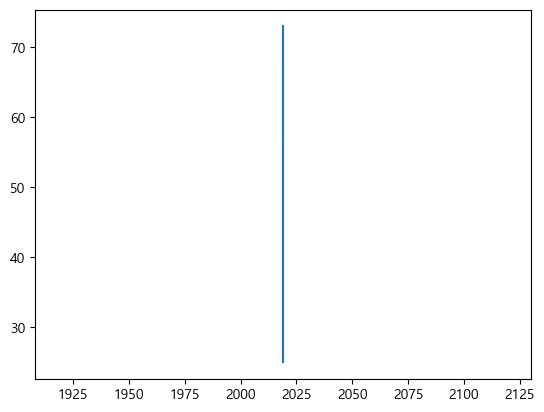

In [27]:
# 1) year를 x축으로 하고, value를 y축으로 하는 line plot을 그리세요. 
plt.plot(users3['year'],users3['value']) 
plt.show()

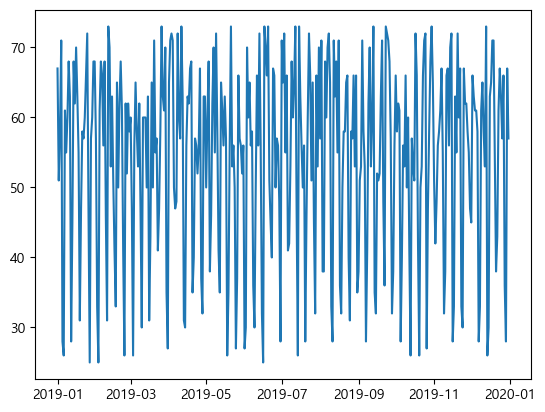

In [29]:
plt.plot(users3['date'],users3['value'])
plt.show()

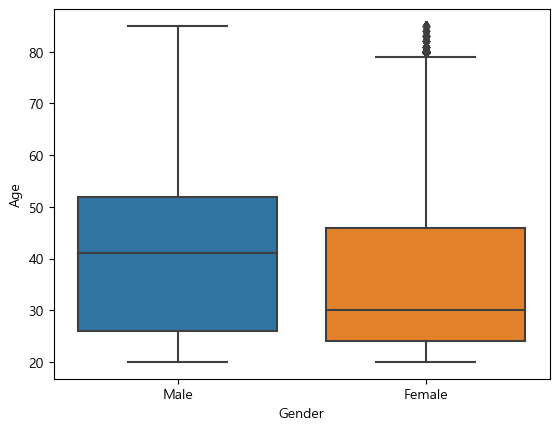

In [32]:
# insurance_df 데이터를 사용합니다. 
# 1) Gender를 x축으로 하고, Age를 y축으로 하는 boxplot을 그리세요. 
import seaborn as sns
sns.boxplot(data=insurance_df,x='Gender',y='Age')
plt.show()

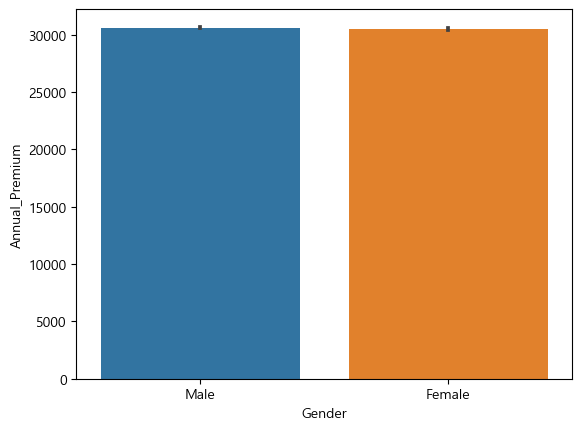

In [34]:
# 1) Gender을 x축으로 하고, Annual Premium을 y축으로 하는 bar plot을 그리세요. 
sns.barplot(data=insurance_df,x='Gender',y='Annual_Premium')
plt.show()

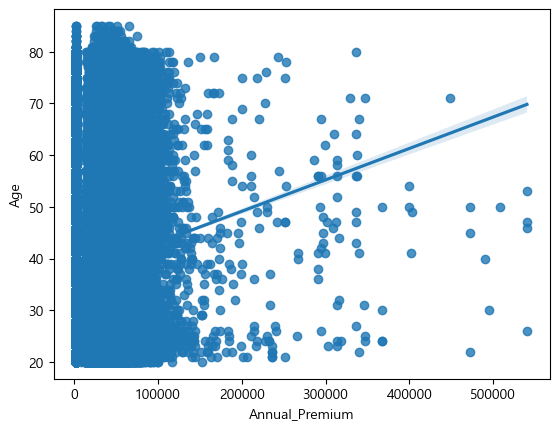

In [35]:
sns.regplot(data=insurance_df,x='Annual_Premium',y='Age')
plt.show() #증가할 수록 같이 증가하는 경향을 보인다.

In [36]:

academic5 = pd.read_csv('../academic.csv')
print(academic5.head())

      year  students  us_students  undergraduate  graduate  non_degree  opt
0  1948/49     25464    2403400.0            NaN       NaN         NaN  NaN
1  1949/50     26433    2445000.0            NaN       NaN         NaN  NaN
2  1950/51     29813    2281000.0            NaN       NaN         NaN  NaN
3  1951/52     30462    2102000.0            NaN       NaN         NaN  NaN
4  1952/53     33675    2134000.0            NaN       NaN         NaN  NaN


In [37]:
# 1) 데이터의 형태(shape)를 확인하세요. 
print(academic5.shape)

(75, 7)


In [38]:
# 2) 각 컬럼들의 데이터 형태(type)를 확인하세요. 
print(academic5.dtypes)

year              object
students           int64
us_students      float64
undergraduate    float64
graduate         float64
non_degree       float64
opt              float64
dtype: object


In [39]:
# 3) 각 컬럼들의 결측치 개수를 확인하세요.
print(academic5.isna().sum())

year              0
students          0
us_students       3
undergraduate    26
graduate         26
non_degree       31
opt              31
dtype: int64


In [40]:
# 4) 결측치가 있을 경우, 0으로 채우고 결측치가 없는지 다시 확인하세요. 
academic5 = academic5.fillna(0)
print(academic5.isna().sum())

year             0
students         0
us_students      0
undergraduate    0
graduate         0
non_degree       0
opt              0
dtype: int64


In [42]:
# 5) str.split을 사용해 year 값만 추출한 새로운 컬럼을 만드세요. 
academic5['splt_year'] = academic5['year'].str.split('/',expand=True)[0]
print(academic5.head())

      year  students  us_students  undergraduate  graduate  non_degree  opt  \
0  1948/49     25464    2403400.0            0.0       0.0         0.0  0.0   
1  1949/50     26433    2445000.0            0.0       0.0         0.0  0.0   
2  1950/51     29813    2281000.0            0.0       0.0         0.0  0.0   
3  1951/52     30462    2102000.0            0.0       0.0         0.0  0.0   
4  1952/53     33675    2134000.0            0.0       0.0         0.0  0.0   

  splt_year  
0      1948  
1      1949  
2      1950  
3      1951  
4      1952  


In [49]:
# 6) groupby를 사용하여 students 컬럼의 연도별(year) 평균, 최소, 최대, 합계를 구하세요. 
print('mean',academic5.drop(['year'],axis=1).groupby(['splt_year']).mean()['students'])
print('max',academic5.drop(['year'],axis=1).groupby(['splt_year']).max()['students'])
print('min',academic5.drop(['year'],axis=1).groupby(['splt_year']).min()['students'])
print('sum',academic5.drop(['year'],axis=1).groupby(['splt_year']).sum()['students'])

mean splt_year
1948      25464.0
1949      26433.0
1950      29813.0
1951      30462.0
1952      33675.0
          ...    
2018    1095299.0
2019    1075496.0
2020     914095.0
2021     948519.0
2022    1057188.0
Name: students, Length: 75, dtype: float64
max splt_year
1948      25464
1949      26433
1950      29813
1951      30462
1952      33675
         ...   
2018    1095299
2019    1075496
2020     914095
2021     948519
2022    1057188
Name: students, Length: 75, dtype: int64
min splt_year
1948      25464
1949      26433
1950      29813
1951      30462
1952      33675
         ...   
2018    1095299
2019    1075496
2020     914095
2021     948519
2022    1057188
Name: students, Length: 75, dtype: int64
sum splt_year
1948      25464
1949      26433
1950      29813
1951      30462
1952      33675
         ...   
2018    1095299
2019    1075496
2020     914095
2021     948519
2022    1057188
Name: students, Length: 75, dtype: int64


In [50]:
# 7) pandas profiling 리포트를 만들고 제출하세요. 
from ydata_profiling import ProfileReport
from IPython.display import display
profile = ProfileReport(academic5,title="profiling report",explorative=True)
profile.to_file("profiling_report_academic5_df.html")


C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]